In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits

### 머신 모델을 이용해 학습
- DecisionTreeClassifier 사용(max_depth=3)
- 모델생성
- 학습(train)
- 평가(train/test)
    - accuracy, recall, precision, f1 score, confusion_matrix 확인

In [2]:
digits = load_digits()
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [3]:
X = digits.data
y = digits.target
X.shape, y.shape

((1797, 64), (1797,))

In [4]:
np.unique(y, return_counts=True)   # (고유값배열, 개수)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([178, 182, 177, 183, 181, 182, 181, 179, 174, 180], dtype=int64))

In [5]:
y = np.where(y==9, 1, 0)
y

array([0, 0, 0, ..., 0, 1, 0])

In [6]:
y_pct = np.unique(y, return_counts=True)
y_pct

(array([0, 1]), array([1617,  180], dtype=int64))

In [7]:
y_pct[1]/y.size 

array([0.89983306, 0.10016694])

In [34]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split

X_train, X_test,y_train, y_test = train_test_split(X, y,
                                                  test_size=0.2,
                                                  random_state=0,
                                                  stratify=digits.target)

print(X_train.shape, X_train.shape, y_train.shape, y_test.shape)
print(np.unique(digits.target, return_counts=True))  # return_counts=True : 갯수표시
print(np.unique(y_train, return_counts=True))

(1437, 64) (1437, 64) (1437,) (360,)
(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), array([178, 182, 177, 183, 181, 182, 181, 179, 174, 180], dtype=int64))
(array([0, 1]), array([1293,  144], dtype=int64))


##### 모델생성

In [35]:
tree = DecisionTreeClassifier(max_depth=3, random_state=0)
rf = RandomForestClassifier(n_estimators=100, max_depth=3, random_state=0)

In [36]:
tree.fit(X_train, y_train)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=3, random_state=0)

##### 추론

In [45]:
pred_train_tree = tree.predict(X_train)
pred_test_tree = tree.predict(X_test)

pred_train_rf = rf.predict(X_train)
pred_test_rf = rf.predict(X_test)

In [46]:
# confusion matrix
print('Tree')
print(confusion_matrix(y_train, pred_train_tree))
print('-'*30)
print(confusion_matrix(y_test, pred_test_tree))

Tree
[[1249   44]
 [  29  115]]
------------------------------
[[314  10]
 [  8  28]]


In [75]:
# confusion matrix
print('RF')
print(confusion_matrix(y_train, pred_train_rf))
print('-'*30)
print(confusion_matrix(y_test, pred_test_rf))

RF
[[1293    0]
 [  97   47]]
------------------------------
[[324   0]
 [ 29   7]]


In [63]:
# RandomForest
def display_cm(y, pred, title):
    """
    Confusion Matrix 시각화 함수
    [Parameter]
        y: ndarray - 정답(Ground Truth)
        pred: ndarray - 모델이 예측한 값
        title: str - 그래프의 제목
    [Return]
    [Exception]    
    """
    plt.figure(figsize=(7,6))
    ax = plt.gca()

    cm = confusion_matrix(y, pred)
    disp = ConfusionMatrixDisplay(cm)
    disp.plot(cmap=('Blues'), ax=ax)
    plt.title(title)
    plt.show()

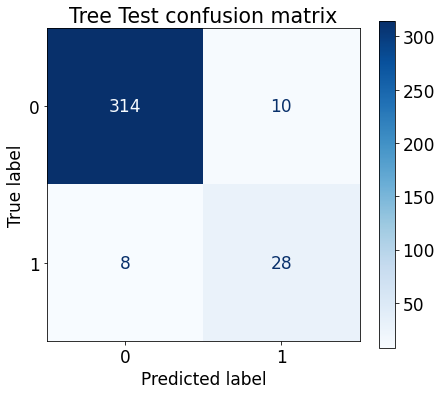

In [64]:
display_cm(y_test, pred_test_tree, 'Tree Test confusion matrix')

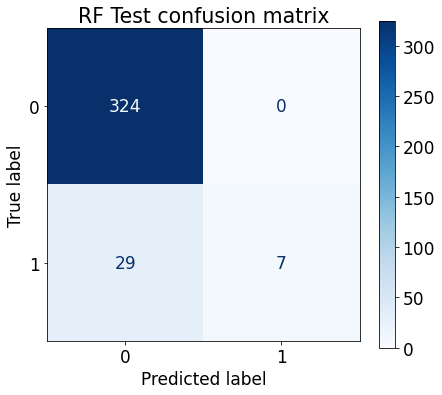

In [65]:
display_cm(y_test, pred_test_rf, 'RF Test confusion matrix')

##### 학습

In [10]:
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

##### 평가

accuracy, recall, precision, f1 score, confusion_matrix 확인

In [67]:
def print_metrics_classifier(y, pred, title):
    """
    accuracy, recall, precision, f1 점수를 출력하는 함수
    [Paremetre]
        y: ndarray - 정답(Ground Truth)
        pred: ndarray - 모델이 예측한 값
        title: str - 제목
    [Returen]
    [Exception]
    """
    print(title)
    print('정확도(Accuracy): ', accuracy_score(y, pred))
    print('재현률(Recall): ', recall_score(y, pred))
    print('F1점수: ', f1_score(y, pred))

In [70]:
print_metrics_classifier(y_train, pred_train_tree, 'tree-train')

tree-train
정확도(Accuracy):  0.9491997216423104
재현률(Recall):  0.7986111111111112
F1점수:  0.759075907590759


In [72]:
print_metrics_classifier(y_test, pred_test_tree, 'tree-test')

tree-test
정확도(Accuracy):  0.95
재현률(Recall):  0.7777777777777778
F1점수:  0.7567567567567567


In [73]:
print_metrics_classifier(y_train, pred_train_rf, 'rf-train')

rf-train
정확도(Accuracy):  0.9324982602644398
재현률(Recall):  0.3263888888888889
F1점수:  0.49214659685863876


In [74]:
print_metrics_classifier(y_test, pred_test_rf, 'rf-test')

rf-test
정확도(Accuracy):  0.9194444444444444
재현률(Recall):  0.19444444444444445
F1점수:  0.32558139534883723
